## Data Enhancement and Augmentation Techniques for Oculomotoric Biometric Identification using DeepEye

In [1]:
import os
import socket

%pylab inline
%load_ext autoreload
%autoreload 2
print(socket.gethostname())

Populating the interactive namespace from numpy and matplotlib
gpu03


In [2]:
import joblib
import numpy as np
import random
from Evaluation import evaluation
import sys
import seaborn as sns
from tqdm.notebook import tqdm

## Download the data
* the data can be found here: 
    * Data/test_data.npz https://osf.io/g8rvb/download
    * Data/train_data.npz https://osf.io/s7vay/download
* the file structure should look like this:
    * Data/
    * ├── test_data_10.npz
    * └── train_data_10.npz

## Set up the GPU you want to train on
* if you want to train on Google-Colab or the CPU you don't need to specify the GPU

In [3]:
flag_train_on_gpu = True
GPU = 1
if flag_train_on_gpu:
    import tensorflow as tf
    # select graphic card
    os.environ["CUDA_VISIBLE_DEVICES"] = str(GPU)
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    config = tf.compat.v1.ConfigProto(log_device_placement=True)
    config.gpu_options.per_process_gpu_memory_fraction = 0.5
    config.gpu_options.allow_growth = True
    tf_session = tf.compat.v1.Session(config=config)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:04:00.0, compute capability: 5.2



## Load the data and the parameter for the model

In [4]:
Y_columns = {'subId': 0,
 'session': 1,
 'trialId': 2,
 'seqId': 3,
 'original_trial_length_before_padding': 4}

train_data = np.load('Data/train_data_10.npz')
test_data = np.load('Data/test_data_10.npz')
X_train = train_data['X_train']
Y_train = train_data['Y_train']
X_test = test_data['X_test']
Y_test = test_data['Y_test']

# if you are running the notebook on Google-Colab or you don't have enough RAM 
# you can reduce the number of training/test samples by using only a subset
# of all sessions. In total there are 4 sessions (1,2,3,4). Uncomment the
# lines below to use only the first 2 sessions.

'''
sessions_use = [1.,2.]

train_ids = np.isin(Y_train[:,Y_columns['session']], sessions_use)
test_ids  = np.isin(Y_test[:,Y_columns['session']], sessions_use) 

X_train = X_train[train_ids]
Y_train = Y_train[train_ids]
X_test = X_test[test_ids]
Y_test = Y_test[test_ids]
'''

"\nsessions_use = [1.,2.]\n\ntrain_ids = np.isin(Y_train[:,Y_columns['session']], sessions_use)\ntest_ids  = np.isin(Y_test[:,Y_columns['session']], sessions_use) \n\nX_train = X_train[train_ids]\nY_train = Y_train[train_ids]\nX_test = X_test[test_ids]\nY_test = Y_test[test_ids]\n"

### Show example instances of the data

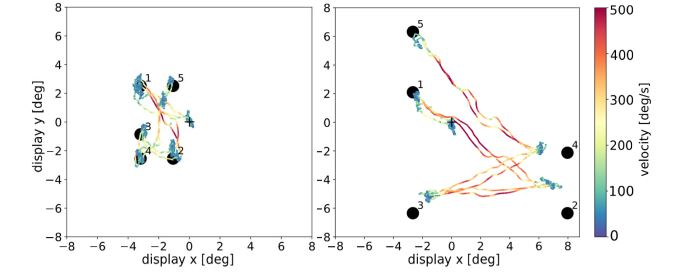

In [5]:
from IPython.display import Image
Image(filename='images/scanpaths.jpg')

## Apply the Data Augmentation/Enhancement
* Here you should implement your own data augmentation/enhancement
* implement the function 'transform(X_train,Y_train,Y_columns)' in 'DataAugmentation/data_augmentation.py'

In [6]:
from DataAugmentation import data_augmentation
X_train_augmented,Y_train_augmented = data_augmentation.transform(X_train,Y_train,Y_columns)

## Train model and get embeddings

In [7]:
embeddings_concatenated_augmented = evaluation.evaluate_create_test_embeddings(X_train_augmented,Y_train_augmented,X_test,Y_test,Y_columns)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
fast_input (InputLayer)         [(None, 1000, 4)]    0                                            
__________________________________________________________________________________________________
slow_input (InputLayer)         [(None, 1000, 4)]    0                                            
__________________________________________________________________________________________________
slow_velocity_diff_input (Input [(None, 1000, 2)]    0                                            
__________________________________________________________________________________________________
fast_transform (TransformationL (None, 1000, 4)      0           fast_input[0][0]                 
____________________________________________________________________________________________

Epoch 1/100
338/338 [==============================] - 20s 48ms/step - loss: 2.3892 - accuracy: 0.2555 - val_loss: 2.0865 - val_accuracy: 0.4254
Epoch 2/100
338/338 [==============================] - 15s 45ms/step - loss: 1.1192 - accuracy: 0.6235 - val_loss: 1.3180 - val_accuracy: 0.6257
Epoch 3/100
338/338 [==============================] - 15s 45ms/step - loss: 0.5820 - accuracy: 0.8112 - val_loss: 0.6926 - val_accuracy: 0.7886
Epoch 4/100
338/338 [==============================] - 15s 45ms/step - loss: 0.4017 - accuracy: 0.8703 - val_loss: 0.7518 - val_accuracy: 0.7835
Epoch 5/100
338/338 [==============================] - 15s 46ms/step - loss: 0.2986 - accuracy: 0.9024 - val_loss: 0.6598 - val_accuracy: 0.8043
Epoch 6/100
338/338 [==============================] - 15s 46ms/step - loss: 0.2403 - accuracy: 0.9218 - val_loss: 0.3516 - val_accuracy: 0.8919
Epoch 7/100
338/338 [==============================] - 15s 46ms/step - loss: 0.1950 - accuracy: 0.9380 - val_loss: 0.3318 - val_ac

338/338 [==============================] - 14s 43ms/step - loss: 0.1058 - accuracy: 0.9649 - val_loss: 0.2751 - val_accuracy: 0.9176
Epoch 14/100
338/338 [==============================] - 14s 43ms/step - loss: 0.0878 - accuracy: 0.9686 - val_loss: 0.4386 - val_accuracy: 0.8825
Epoch 15/100
338/338 [==============================] - 14s 43ms/step - loss: 0.0726 - accuracy: 0.9771 - val_loss: 0.2613 - val_accuracy: 0.9261
Epoch 16/100
338/338 [==============================] - 14s 42ms/step - loss: 0.0855 - accuracy: 0.9720 - val_loss: 0.3196 - val_accuracy: 0.9125
Epoch 17/100
338/338 [==============================] - 14s 43ms/step - loss: 0.0776 - accuracy: 0.9757 - val_loss: 0.2699 - val_accuracy: 0.9279
Epoch 18/100
338/338 [==============================] - 14s 43ms/step - loss: 0.0610 - accuracy: 0.9793 - val_loss: 0.3016 - val_accuracy: 0.9178
Epoch 19/100
338/338 [==============================] - 14s 43ms/step - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.5647 - val_accuracy

In [8]:
embeddings_concatenated_baseline = evaluation.evaluate_create_test_embeddings(X_train,Y_train,X_test,Y_test,Y_columns)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
fast_input (InputLayer)         [(None, 1000, 4)]    0                                            
__________________________________________________________________________________________________
slow_input (InputLayer)         [(None, 1000, 4)]    0                                            
__________________________________________________________________________________________________
slow_velocity_diff_input (Input [(None, 1000, 2)]    0                                            
__________________________________________________________________________________________________
fast_transform (TransformationL (None, 1000, 4)      0           fast_input[0][0]                 
____________________________________________________________________________________________

Epoch 1/100
1688/1688 [==============================] - 82s 47ms/step - loss: 3.5721 - accuracy: 0.1262 - val_loss: 2.3451 - val_accuracy: 0.3560
Epoch 2/100
1688/1688 [==============================] - 78s 46ms/step - loss: 1.8935 - accuracy: 0.4569 - val_loss: 1.4527 - val_accuracy: 0.5774
Epoch 3/100
1688/1688 [==============================] - 78s 46ms/step - loss: 1.1700 - accuracy: 0.6544 - val_loss: 0.9414 - val_accuracy: 0.7170
Epoch 4/100
1688/1688 [==============================] - 77s 46ms/step - loss: 0.8812 - accuracy: 0.7342 - val_loss: 0.8527 - val_accuracy: 0.7429
Epoch 5/100
1688/1688 [==============================] - 77s 46ms/step - loss: 0.7079 - accuracy: 0.7827 - val_loss: 0.6870 - val_accuracy: 0.7919
Epoch 6/100
1688/1688 [==============================] - 77s 45ms/step - loss: 0.5814 - accuracy: 0.8194 - val_loss: 0.6361 - val_accuracy: 0.8094
Epoch 7/100
1688/1688 [==============================] - 77s 46ms/step - loss: 0.4983 - accuracy: 0.8449 - val_loss: 0

1688/1688 [==============================] - 59s 35ms/step - loss: 0.0091 - accuracy: 0.9995 - val_loss: 0.2316 - val_accuracy: 0.9359
Epoch 7/100
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0058 - accuracy: 0.9998 - val_loss: 0.2347 - val_accuracy: 0.9361
Epoch 8/100
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0041 - accuracy: 0.9998 - val_loss: 0.2344 - val_accuracy: 0.9376
Epoch 9/100
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.2416 - val_accuracy: 0.9367
Epoch 10/100
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.2445 - val_accuracy: 0.9378
Epoch 11/100
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.2475 - val_accuracy: 0.9382
Epoch 12/100
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2528 - v

## Plot results

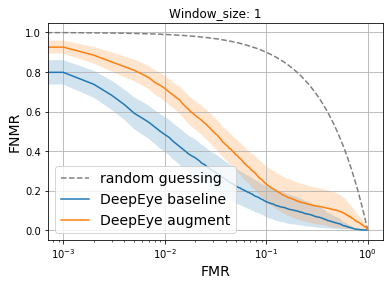

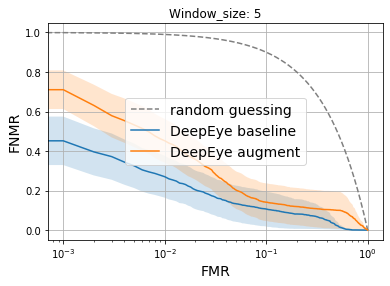

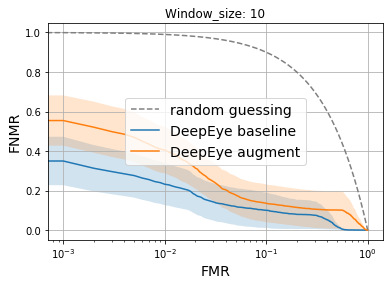

In [9]:
window_sizes = [1,5,10]
n_train_users = 0
n_enrolled_users = 1
n_impostors = 24
n_enrollment_sessions = 3
n_test_sessions = 1
test_user = None
test_sessions = None
user_test_sessions = None 
enrollment_sessions = None
verbose = 0
random_state = 42,
seconds_per_session = None
model_names = ['DeepEye baseline',
              'DeepEye augment']
embedding_list = [embeddings_concatenated_baseline,embeddings_concatenated_augmented]
metric_lists = []
for i in range(len(model_names)):
    metric_dict = dict()
    for random_state in tqdm(np.arange(10)):
        from sklearn import metrics
        (score_dicts, label_dicts) = evaluation.get_scores_and_labels_from_raw(
                                    test_embeddings=embedding_list[i],
                                    Y_test=Y_test,
                                    Y_columns=Y_columns,
                                    window_sizes=window_sizes,
                                    n_train_users = n_train_users,
                                    n_enrolled_users = n_enrolled_users,
                                    n_impostors = n_impostors,
                                    n_enrollment_sessions = n_enrollment_sessions,
                                    n_test_sessions = n_test_sessions,
                                    test_user = test_user,
                                    test_sessions = test_sessions,
                                    user_test_sessions = user_test_sessions,
                                    enrollment_sessions = enrollment_sessions,
                                    verbose = verbose,
                                    random_state = random_state,
                                    seconds_per_session = seconds_per_session)

        for window_size in window_sizes:
            window_size = str(window_size)
            cur_scores = score_dicts[window_size]
            cur_label  = label_dicts[window_size]
            fpr, tpr, thresholds = metrics.roc_curve(cur_label, cur_scores, pos_label=1)
            if window_size not in metric_dict:
                metric_dict[window_size] = dict()
            if 'fpr' not in  metric_dict[window_size]:
                metric_dict[window_size]['fpr'] = []
                metric_dict[window_size]['tpr'] = []
            metric_dict[window_size]['fpr'].append(fpr)
            metric_dict[window_size]['tpr'].append(tpr)
    metric_lists.append(metric_dict)


for window_size in window_sizes:
    for i in range(len(model_names)):
        metric_dict = metric_lists[i]
        model_name = model_names[i]
        if i == 0:
            plot_random = True
        else:
            plot_random = False
        window_size = str(window_size)
        evaluation.avg_fnr_fpr_curve(metric_dict[window_size]['fpr'], metric_dict[window_size]['tpr'], 
                label = model_name, plot_random=plot_random,
                title = 'Window_size: ' + window_size, plot_statistics = False,
                loc = 'best', plot_legend = True,
                plot_points = 1000, ncol=1,
                bbox_to_anchor=None,
                starting_point = None,
                fontsize = 14, xscale = 'log',
                setting = 'verification')
    plt.show()

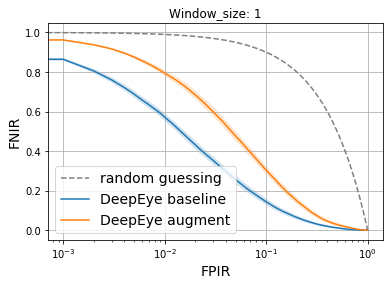

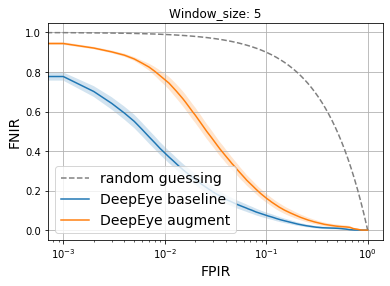

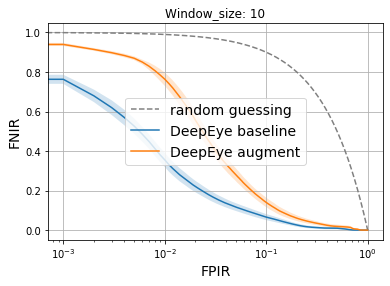

In [10]:
window_sizes = [1,5,10]
n_train_users = 0
n_enrolled_users = 20
n_impostors = 5
n_enrollment_sessions = 3
n_test_sessions = 1
test_user = None
test_sessions = None
user_test_sessions = None 
enrollment_sessions = None
verbose = 0
random_state = 42,
seconds_per_session = None
model_names = ['DeepEye baseline',
              'DeepEye augment']
embedding_list = [embeddings_concatenated_baseline,embeddings_concatenated_augmented]
metric_lists = []
for i in range(len(model_names)):
    metric_dict = dict()
    for random_state in tqdm(np.arange(10)):
        from sklearn import metrics
        (score_dicts, label_dicts) = evaluation.get_scores_and_labels_from_raw(
                                    test_embeddings=embedding_list[i],
                                    Y_test=Y_test,
                                    Y_columns=Y_columns,
                                    window_sizes=window_sizes,
                                    n_train_users = n_train_users,
                                    n_enrolled_users = n_enrolled_users,
                                    n_impostors = n_impostors,
                                    n_enrollment_sessions = n_enrollment_sessions,
                                    n_test_sessions = n_test_sessions,
                                    test_user = test_user,
                                    test_sessions = test_sessions,
                                    user_test_sessions = user_test_sessions,
                                    enrollment_sessions = enrollment_sessions,
                                    verbose = verbose,
                                    random_state = random_state,
                                    seconds_per_session = seconds_per_session)

        for window_size in window_sizes:
            window_size = str(window_size)
            cur_scores = score_dicts[window_size]
            cur_label  = label_dicts[window_size]
            fpr, tpr, thresholds = metrics.roc_curve(cur_label, cur_scores, pos_label=1)
            if window_size not in metric_dict:
                metric_dict[window_size] = dict()
            if 'fpr' not in  metric_dict[window_size]:
                metric_dict[window_size]['fpr'] = []
                metric_dict[window_size]['tpr'] = []
            metric_dict[window_size]['fpr'].append(fpr)
            metric_dict[window_size]['tpr'].append(tpr)
    metric_lists.append(metric_dict)


for window_size in window_sizes:
    for i in range(len(model_names)):
        metric_dict = metric_lists[i]
        model_name = model_names[i]
        if i == 0:
            plot_random = True
        else:
            plot_random = False
        window_size = str(window_size)
        evaluation.avg_fnr_fpr_curve(metric_dict[window_size]['fpr'], metric_dict[window_size]['tpr'], 
                label = model_name, plot_random=plot_random,
                title = 'Window_size: ' + window_size, plot_statistics = False,
                loc = 'best', plot_legend = True,
                plot_points = 1000, ncol=1,
                bbox_to_anchor=None,
                starting_point = None,
                fontsize = 14, xscale = 'log',
                setting = 'identification')
    plt.show()